In [ ]:
"""

Be able to Identify the axons like parts in cell to be able to 
make things errors

"""

In [1]:
print("hi")

hi


In [2]:
from os import sys
sys.path.append("/meshAfterParty/")

In [3]:
from importlib import reload

import neuron_utils as nru

import neuron

import neuron_visualizations as nviz

import time

import datajoint_utils as du

INFO - 2020-11-27 22:06:31,032 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2020-11-27 22:06:31,033 - settings - Setting database.user to celiib
INFO - 2020-11-27 22:06:31,034 - settings - Setting database.password to newceliipass


In [4]:
import neuron_visualizations as nviz
curr_seg_id = 864691134884741882
minnie,schema = du.configure_minnie_vm()

INFO - 2020-11-27 22:06:31,051 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2020-11-27 22:06:31,052 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-27 22:06:31,063 - connection - Connected celiib@at-database.ad.bcm.edu:3306
INFO - 2020-11-27 22:06:31,236 - settings - Setting enable_python_native_blobs to True


Connecting celiib@at-database.ad.bcm.edu:3306


In [5]:
(minnie.Decomposition() & "n_somas = 1" & "n_faces>500000") & "n_same_soma_multi_touching_limbs>0"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),decomposition,n_vertices number of vertices,n_faces number of faces,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691134884741882,0,0.25,=BLOB=,843280,1700959,2,2,0,1,10,583,190,9413167.750364104,3368032.161881765,7808.186,114.566,114.566,435.79,391.447,3034,0.00032231445146429523,5.204116638078903,4757150.4,249,nan,nan,191374383459.08017,42245315.42166233,20330.497504591665,40228.78558960006,768571821.120804,4240.5491
864691134884743930,0,0.25,=BLOB=,374888,770862,1,1,0,1,7,102,37,3947733.1853591506,1493754.0330579386,18624.179,122.975,122.975,536.469,471.729,1555,0.0003938969345159865,15.245098039215685,2460060.756,45,nan,nan,72821276363.5538,30931750.13158639,18446.352107488943,29601.413780511444,1618250585.8567512,2185.5764
864691134884744186,0,0.25,=BLOB=,298676,599981,1,1,0,1,8,461,220,6381578.759465553,2926907.6704523424,8563.802,74.779,74.779,117.861,117.861,5,7.835051777091507e-07,0.010845986984815618,235742.906,23,nan,nan,182351327.99166265,22639885.7583313,28.57464192872146,773.5177744507089,7928318.608333158,1002.7609
864691134884749050,0,0.25,=BLOB=,333547,690610,1,1,0,1,6,227,150,5923256.260350557,3562420.9528414337,15945.722,91.936,91.936,247.021,245.172,141,2.3804474059958224e-05,0.6211453744493393,871126.173,30,nan,nan,6818450888.328257,26686104.138326008,1151.1321794348164,7827.167980554129,227281696.27760854,1224.9961
864691134884749818,0,0.25,=BLOB=,408678,840775,1,1,0,1,5,116,58,2857353.6043665437,1383537.6068893261,10653.49,383.725,296.325,509.887,490.661,2202,0.0007706431561830335,18.982758620689655,2724171.909,91,nan,nan,166090592271.93384,48686052.66318766,58127.41972786214,60969.20378747428,1825171343.6476245,2592.1839
864691134884756218,0,0.25,=BLOB=,421724,868316,1,1,0,1,7,157,60,3891046.292054618,1585908.1439105992,13025.813,164.71,164.71,495.423,413.902,2320,0.0005962406576188415,14.777070063694268,2509957.646,89,nan,nan,117627626385.24652,31832415.7744201,30230.33332331154,46864.386963941026,1321658723.4297361,1450.6105
864691134884761082,0,0.25,=BLOB=,558183,1132950,1,1,0,1,6,193,56,4434613.767862454,1710711.9206096916,12779.018,359.991,297.716,510.219,464.549,2505,0.0005648744470496345,12.979274611398964,3974606.818,150,nan,nan,193505892108.93225,40990324.512161255,43635.34283667838,48685.543242313295,1290039280.7262151,3021.3421
864691134884761338,0,0.25,=BLOB=,410066,832

In [6]:
neuron_obj = (minnie.Decomposition() & dict(segment_id=curr_seg_id)).fetch1("decomposition")

INFO - 2020-11-27 22:06:32,834 - settings - Setting enable_python_native_blobs to True
INFO - 2020-11-27 22:06:33,037 - settings - Setting enable_python_native_blobs to True


Decompressing Neuron in minimal output mode...please wait


In [7]:
nru = reload(nru)

# Getting the errored limbs

In [38]:
import error_detection as ed


In [68]:
nviz.plot_objects(meshes=[neuron_obj.mesh.submesh([curr_err_faces],append=True),
                          neuron_obj[2].mesh],
                 meshes_colors=["black","red"])

In [72]:
ed = reload(ed)
sk = reload(sk)
xu = reload(xu)
curr_err_faces = ed.error_faces_by_axons(neuron_obj,visualize_errors_at_end=True,verbose=True)

functions_list = [<function width at 0x7f0ae6276bf8>, <function median_mesh_center at 0x7f0ae6276ea0>, <function n_spines at 0x7f0ae6276d08>, <function n_faces_branch at 0x7f0ae6276a60>, <function skeleton_distance_branch at 0x7f0ae6276c80>, <function spines_per_skeletal_length at 0x7f0ae62781e0>, <function no_spine_median_mesh_center at 0x7f0ae6278048>]
functions_list = [<function axon_segment at 0x7f0ae6278840>]
Axons not keeping because of soma: {'L3': array([14, 15, 16]), 'L5': array([], dtype=int64), 'L6': array([13, 14, 15])}

----- Working on L0 ------
-- Axon Group 0 of size 26--
   Working on soma 0, starting_node 18
Not using AIS angle threshold
sk_angle= 89.46776344189387
*****Path to axon group not valid******
   Working on soma 0, starting_node 9
Not using AIS angle threshold
sk_angle= 75.42095619638175
*****Path to axon group not valid******
   Working on soma 0, starting_node 18
Not using AIS angle threshold
sk_angle= 89.46776344189387
*****Path to axon group not valid**

In [64]:
ret_colors = nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh"],
                     limb_branch_dict=dict(L2="all"),
                     mesh_resolution="limb",
                                   mesh_color_alpha=1,
                     return_color_dict=True)


 Working on visualization type: mesh
Working on  new stand alone scatter points


In [62]:
ret_colors

{'L0': array([0., 0., 1., 1.]),
 'L1': array([0.        , 0.50196078, 0.        , 1.        ]),
 'L2': array([1., 0., 0., 1.]),
 'L3': array([0., 1., 1., 1.]),
 'L4': array([1., 0., 1., 1.]),
 'L5': array([0., 0., 0., 1.]),
 'L6': array([0.50196078, 0.50196078, 0.50196078, 1.        ]),
 'L7': array([0.09803922, 0.09803922, 0.43921569, 1.        ]),
 'L8': array([1.        , 0.75294118, 0.79607843, 1.        ]),
 'L9': array([0.8627451 , 0.07843137, 0.23529412, 1.        ]),
 'S0': array([1. , 0. , 0. , 0.2])}

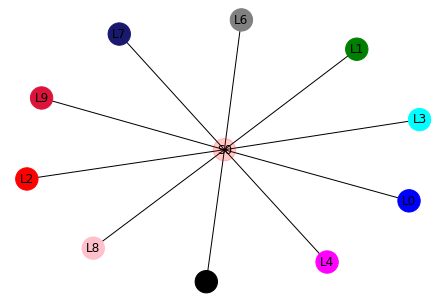

In [63]:
nviz.plot_soma_limb_concept_network(neuron_obj,
                                     node_colors=ret_colors)

In [46]:
curr_err_faces.astype("int")

array([ 579857.,  579858.,  579859., ..., 1700793., 1700794., 1700795.])

In [48]:
neuron_obj.mesh.submesh([curr_err_faces.astype("int")],append=True)

<trimesh.Trimesh(vertices.shape=(158781, 3), faces.shape=(316869, 3))>

In [15]:
if True:
        nviz.plot_objects(main_mesh = neuron_obj.mesh,
            meshes=[neuron_obj.mesh.submesh(error_faces_concat,append=True)],
                         meshes_colors=["red"])

> /meshAfterParty/error_detection.py(419)error_faces_by_axons()
    417 
    418                     restricted_skeleton = ordered_path_skeleton[keep_skeleton_indices]
--> 419                     restricted_skeleton_endpoints_sk = np.array([restricted_skeleton[0][0],restricted_skeleton[-1][-1]]).reshape(-1,2,3)
    420                     restricted_skeleton_vector = np.array(restricted_skeleton[-1][-1]-restricted_skeleton[0][0])
    421                     restricted_skeleton_vector = restricted_skeleton_vector/np.linalg.norm(restricted_skeleton_vector)

ipdb> ordered_path_skeleton
array([], shape=(0, 2, 3), dtype=float64)
ipdb> path_skeletons
array([[[ 512371.        ,  688665.        , 1068810.        ],
        [ 512592.        ,  688283.        , 1068190.        ]],

       [[ 512592.        ,  688283.        , 1068190.        ],
        [ 512790.        ,  688039.        , 1067730.        ]],

       [[ 512790.        ,  688039.        , 1067730.        ],
        [ 512988.      

In [17]:
import numpy as np
import system_utils as su
start_coord = np.array([ 519245.,  688147., 1060650.])

In [25]:
path_skeletons = su.decompress_pickle("error_sk.pbz2")
path_skeletons

array([[[ 512371.        ,  688665.        , 1068810.        ],
        [ 512592.        ,  688283.        , 1068190.        ]],

       [[ 512592.        ,  688283.        , 1068190.        ],
        [ 512790.        ,  688039.        , 1067730.        ]],

       [[ 512790.        ,  688039.        , 1067730.        ],
        [ 512988.        ,  687857.        , 1067330.        ]],

       ...,

       [[ 518947.39413275,  711717.79612181, 1055578.06095251],
        [ 518951.55521723,  711618.91017328, 1055592.35271789]],

       [[ 518951.51441485,  711420.6046065 , 1055617.93206683],
        [ 518952.62161372,  711519.82674215, 1055605.5327964 ]],

       [[ 518951.55521723,  711618.91017328, 1055592.35271789],
        [ 518952.62161372,  711519.82674215, 1055605.5327964 ]]])

In [19]:
import skeleton_utils as sk

In [26]:
sk = reload(sk)

In [27]:
sk.order_skeleton(path_skeletons,start_coord,verbose=True)

sk_graph_endpt_nodes = [236 406 521]
Using start_endpoint_coordinate = [ 519245.  688147. 1060650.]
start_node_idx = [2]
shortest_path = [521]


array([], shape=(0, 2, 3), dtype=float64)

In [31]:
import networkx_utils as xu
verbose = True
#1) Convert to graph
sk_graph = sk.convert_skeleton_to_graph(path_skeletons)
#2) Find the endpoint nodes
sk_graph_endpt_nodes = np.array(xu.get_nodes_of_degree_k(sk_graph,1))
if verbose:
    print(f"sk_graph_endpt_nodes = {sk_graph_endpt_nodes}")

sk_graph_endpt_nodes = [236 406 521]


In [34]:
nviz.plot_objects(skeletons=[path_skeletons])

In [36]:
x = [4,5,6]
x.remove(5)
x

[4, 6]

In [33]:
nx.number_connected_components(sk_graph)

1

In [ ]:
remaining_limbs = nru.filter_limbs_below_soma_percentile(neuron_obj,visualize_remianing_neuron=True,verbose=False)

In [ ]:
ret_col = nviz.visualize_neuron(neuron_obj,
                     visualize_type=["mesh","skeleton"],
                     limb_branch_dict=dict(
                     return_color_dict=True)

In [ ]:
nru = reload(nru)
nru.same_soma_multi_touching_limbs(neuron_obj,return_n_touches=True)

# How to identify things as axons

In [ ]:
import neuron_searching as ns

In [ ]:
current_neuron = neuron_obj

In [ ]:
axon_like_limb_branch_dict = ns.axon_width_like_segments(current_neuron,
                                                        include_ais=False)

# nviz.visualize_neuron(current_neuron,
#                       visualize_type=["mesh"],
#                      limb_branch_dict=axon_like_limb_branch_dict,
#                      mesh_color="red",
#                       mesh_color_alpha=1,
#                      mesh_whole_neuron=True)

In [ ]:
#How to give a limb_branch_dict as an argument
ns = reload(ns)
current_functions_list = ["axon_segment"]
limb_branch_dict_upstream_filter = ns.query_neuron(current_neuron,
                                   query="axon_segment==True",
                                   function_kwargs=dict(limb_branch_dict =axon_like_limb_branch_dict,
                                                        downstream_face_threshold=3000,
                                                        width_match_threshold=50,
                                                       print_flag=False),
                                   functions_list=current_functions_list)


In [ ]:
colors_dict_returned = nviz.visualize_neuron(current_neuron,
                                             visualize_type=["mesh"],
                      limb_branch_dict=limb_branch_dict_upstream_filter,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)

# Seeing the Degrees of the Path for the self intersections

In [ ]:
"""
Find path to cut:
1) Get the concept network
2) Get all of the starting nodes for somas
3) Get the shortest path between each combination of starting nodes

"""
import networkx_utils as xu
def get_best_cut_edge(curr_limb_graph,cut_path,degrees_of_path):
    #get all indexes that are 4 or higher
    high_degree_indexes = np.where(degrees_of_path>=4)[0]
    if len(high_degree_indexes) == 0:
        return None
    else:
        """
        If there are one or more 4 degree nodes
        1) Find the highest degree node
        2) Find the 
        
        """
        np.argmax(degrees_of_path)


import itertools
import networkx as nx
import copy

verbose = True

curr_limb_idx = 1
curr_limb = neuron_obj[curr_limb_idx]
curr_limb_graph = copy.deepcopy(curr_limb.concept_network)

#2) Get all of the starting nodes for somas
all_starting_nodes = [k["starting_node"] for k in curr_limb.all_concept_network_data]

starting_node_combinations = list(itertools.combinations(all_starting_nodes,2))

for st_n_1,st_n_2 in starting_node_combinations:
    # need to keep cutting until no path for them
    if verbose:
        print(f"---- working on disconnecting {st_n_1} and {st_n_2}")
        
    counter = 0
    while True:
        if verbose:
            print(f" Cut iteration {counter}")
        try:
            soma_to_soma_path = nx.shortest_path(curr_limb_graph,st_n_1,st_n_2)
        except:
            print("No valid path so just skipping ")
            break

        if verbose:
            print(f"Shortest path = {soma_to_soma_path}")
            
        degrees_of_path = xu.get_node_degree(neuron_obj[curr_limb_idx].concept_network,node_name=soma_to_soma_path)
        print(f"degrees_of_path  = {degrees_of_path}")

        # say we found the cut node to make
        cut_edge = get_best_cut_edge(curr_limb_graph,soma_to_soma_path,degrees_of_path)
        curr_limb_graph.remove_edge(*cut_edge)
        
        counter += 1
        break


seperated_graphs = list(nx.connected_components(curr_limb_graph))
print(f"Total number of graphs at the end of the split = {len(seperated_graphs)}")



In [ ]:
highlight_color = [1,0,0,1]
curr_errors = [4, 5, 3, 6, 61, 63, 37, 40, 100, 39, 96, 47, 50, 49, 51]
nviz.visualize_neuron(neuron_obj,
                      visualize_type=["mesh","skeleton","network"],
                     limb_branch_dict={f"L{curr_limb_idx}":"all"},
                      mesh_color={f"L{curr_limb_idx}":dict([(k,highlight_color) for k in curr_errors])},
                      #mesh_color = "green",
                      mesh_fill_color="green",
                      skeleton_color="green",
                      skeleton_fill_color="green",
                      
                      
                     )

# B) Getting All of the Branches That are a certain Distance Away ---

In [ ]:
soma_idx = 0

In [ ]:
distance_from_soma_threshold = 30000
close_limb_branch_dict = ns.query_neuron(current_neuron,
                                        functions_list=[ns.skeletal_distance_from_soma],
                                        query=f"skeletal_distance_from_soma<{distance_from_soma_threshold}",
                                        function_kwargs=dict(somas=[soma_idx]),
                                         #return_dataframe=False


                                        )
close_limb_branch_dict

colors_dict_returned = nviz.visualize_neuron(current_neuron,
                      limb_branch_dict=close_limb_branch_dict,
                     mesh_color="red",
                     mesh_color_alpha=1,
                     mesh_whole_neuron=True,
                     return_color_dict=True)